In [1]:
import solinv.tyrell.spec as S
import solinv.tyrell.dsl as D
from solinv.tyrell.interpreter import InvariantInterpreter
from solinv.environment import InvariantEnvironment

In [10]:
from ray.rllib.agents import ppo
from ray.tune.logger import UnifiedLogger

In [9]:
ppo.DEFAULT_CONFIG

{'num_workers': 2,
 'num_envs_per_worker': 1,
 'create_env_on_driver': False,
 'rollout_fragment_length': 200,
 'batch_mode': 'truncate_episodes',
 'gamma': 0.99,
 'lr': 5e-05,
 'train_batch_size': 4000,
 'model': {'_use_default_native_models': False,
  'fcnet_hiddens': [256, 256],
  'fcnet_activation': 'tanh',
  'conv_filters': None,
  'conv_activation': 'relu',
  'post_fcnet_hiddens': [],
  'post_fcnet_activation': 'relu',
  'free_log_std': False,
  'no_final_linear': False,
  'vf_share_layers': False,
  'use_lstm': False,
  'max_seq_len': 20,
  'lstm_cell_size': 256,
  'lstm_use_prev_action': False,
  'lstm_use_prev_reward': False,
  '_time_major': False,
  'use_attention': False,
  'attention_num_transformer_units': 1,
  'attention_dim': 64,
  'attention_num_heads': 1,
  'attention_head_dim': 32,
  'attention_memory_inference': 50,
  'attention_memory_training': 50,
  'attention_position_wise_mlp_dim': 32,
  'attention_init_gru_gate_bias': 2.0,
  'attention_use_n_prev_actions': 0,


In [2]:
spec = S.parse_file("./dsls/abstract0.tyrell")
start_type = spec.get_type("Expr")
interpreter = InvariantInterpreter()
env_config = {
    "spec": spec,
    "start_type": start_type,
    "max_step": 6,
    # version options are: 0.4.26, 0.5.17, 0.6.12
    "contracts": [
        # sum(balances) <= totalSupply
        # ("./benchmarks/mint_MI.sol", "0.5.17"),
        
        # ("./benchmarks/easy/0x28b5e12cce51f15594b0b91d5b5adaa70f684a02.sol", "0.4.26")
        # ("./benchmarks/easy/0x6704b673c70de9bf74c8fba4b4bd748f0e2190e1.sol", "0.4.26")
        ("./benchmarks/easy/0x6745fab6801e376cd24f03572b9c9b0d4edddccf.sol", "0.4.26")
    ],
    "interpreter": interpreter
}
# need to construct the vocab first to provide parameters for nn
tmp_environment = InvariantEnvironment(config=env_config)

# ======
# contract: ./benchmarks/easy/0x6745fab6801e376cd24f03572b9c9b0d4edddccf.sol
# e2n: {'allowed': 1, 'balances': 2, 'owner': 3, 'paused': 4, 'totalSupply': 5, 'name': 6, 'symbol': 7, 'decimals': 8}
# e2r: set()
# root: 9
# ======


In [7]:
tmp_environment.action_list[0].name

'empty'

In [3]:
tmp_environment.contract_igraph

In [4]:
tmp_environment.contract_root_id

9

In [5]:
tmp_environment.contract_igraph.vs[0]

igraph.Vertex(<igraph.Graph object at 0x7f8e3c2e19a0>, 0, {'token': '<PAD>'})

In [5]:
from solinv.environment.soltype_ast import insert_padding_node

In [6]:
g = insert_padding_node(tmp_environment.contract_igraph)

In [11]:
g.vs[9]

igraph.Vertex(<igraph.Graph object at 0x7fb8e12a1c70>, 9, {'token': 'DFun_arg', 'label_size': 7})

In [8]:
def plot_ast(dt):
    import igraph as ig
    for p in dt.vs:
        p["label_size"]=7
    for p in dt.es:
        p["label_size"]=7
    visual_style = {}
    visual_style["margin"]=60
    visual_style["bbox"]=(800,600)
    visual_style["vertex_label"] = [
        "{}:{}".format(dt.vs["token"][i], dt.vs[i].index) 
        for i in range(len(dt.vs))
    ]
    visual_style["edge_label"] = [
        ("{}:{}".format(dt.es["token"][i], dt.es[i].index))[:]
        for i in range(len(dt.es))
    ]
    print(len(dt.vs), len(dt.es))
    return ig.plot(dt, **visual_style)

126 137


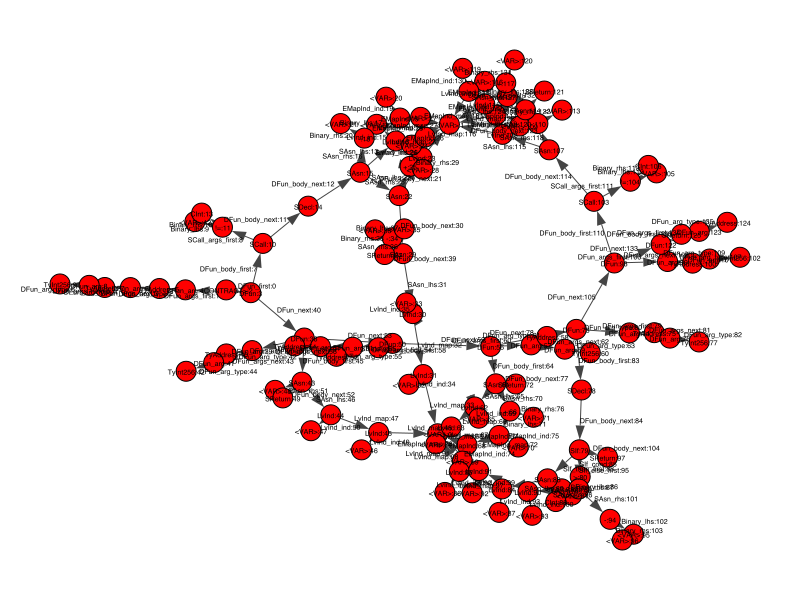

In [9]:
plot_ast(tmp_environment.contract_igraph)

127 137


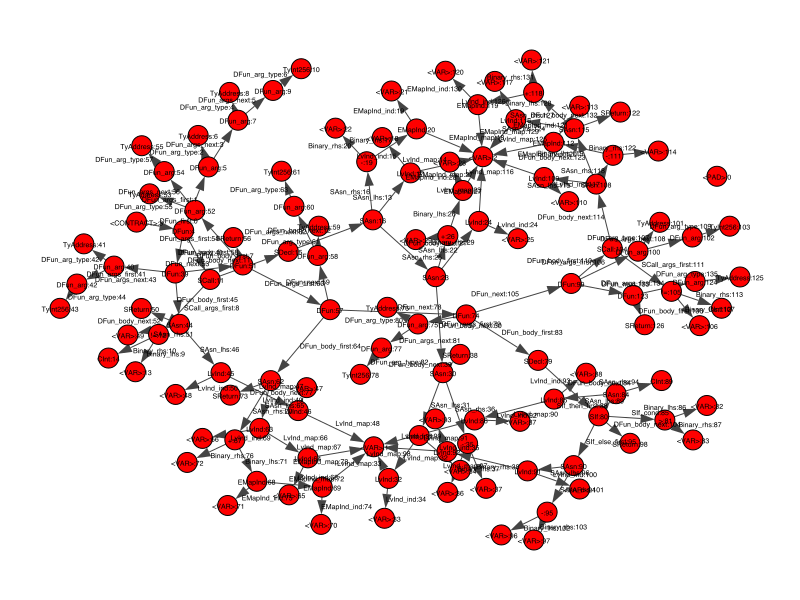

In [10]:
plot_ast(g)